In [13]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
AdaBoost = pickle.load(open('AdaBoost.pkl', 'rb'))
DecisionTree = pickle.load(open('DecisionTree.pkl', 'rb'))
GaussianNB = pickle.load(open('GaussianNB.pkl', 'rb'))
KNeighbours = pickle.load(open('KNeighbors.pkl', 'rb'))
RandomForest = pickle.load(open('RandomForest.pkl', 'rb'))

In [15]:
data = pd.read_csv('test_data.csv').dropna()
data = data[(data['Goal_Difference'] >= -3) & (data['Goal_Difference'] <= 3)]
data.head()

,Home_Team,Away_Team,Home_ELO,Away_ELO,Last_5_Home_Team_avgGoal,Last_5_Away_Team_avgGoal,Last_5_Home_Team_Home_avgGoal,Last_5_Away_Team_Away_avgGoal,Last_5_Home_Team_Home_avgGD,Last_5_Away_Team_Away_avgGD,Last_5_Home_Team_All_avgGD,Last_5_Away_Team_All_avgGD,Last_3_same_team_home_avgGD,Last_3_same_team_away_avgGD,Last_3_same_team_avgGD,Home_Team_Points,Away_Team_Points,Goal_Difference
0,West Bromwich Albion,Man. Utd,75,95,0.8,1.0,1.0,1.0,0.2,0.0,0.8,-0.8,0.0,0.0,0.0,13,7,-3
2,Chelsea,AFC Bournemouth,94,70,2.6,2.0,2.2,1.0,2.0,1.0,0.6,0.4,0.0,0.0,0.0,41,11,-3
4,Chelsea,Stoke City,96,78,2.6,2.0,2.8,1.4,2.8,-0.2,2.0,0.2,0.0,0.0,0.0,68,42,3
5,Arsenal,Queens Park Rangers,93,66,2.0,1.8,1.8,0.4,0.6,1.6,0.8,1.6,0.0,0.0,0.0,15,0,1
6,Aston Villa,Crystal Palace,70,74,0.4,0.8,0.6,0.8,-1.2,1.2,-0.6,0.6,0.0,0.0,1.0,27,9,2


In [16]:
le = pickle.load(open('labelencoder.pkl', 'rb'))
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

/home/sahil/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.1.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
X = data.drop(columns=['Goal_Difference'])
y = data['Goal_Difference']

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
models = ['AdaBoost', 'DecisionTree', 'GaussianNB', 'KNeighbours', 'RandomForest']
f1_scores = []
for model in models:
    if model == 'AdaBoost':
        model = AdaBoost
    elif model == 'DecisionTree':
        model = DecisionTree
    elif model == 'GaussianNB':
        model = GaussianNB
    elif model == 'KNeighbours':
        model = KNeighbours
    elif model == 'RandomForest':
        model = RandomForest
    y_pred = model.predict(X)
    f1_scores.append(f1_score(y, y_pred, average='weighted'))

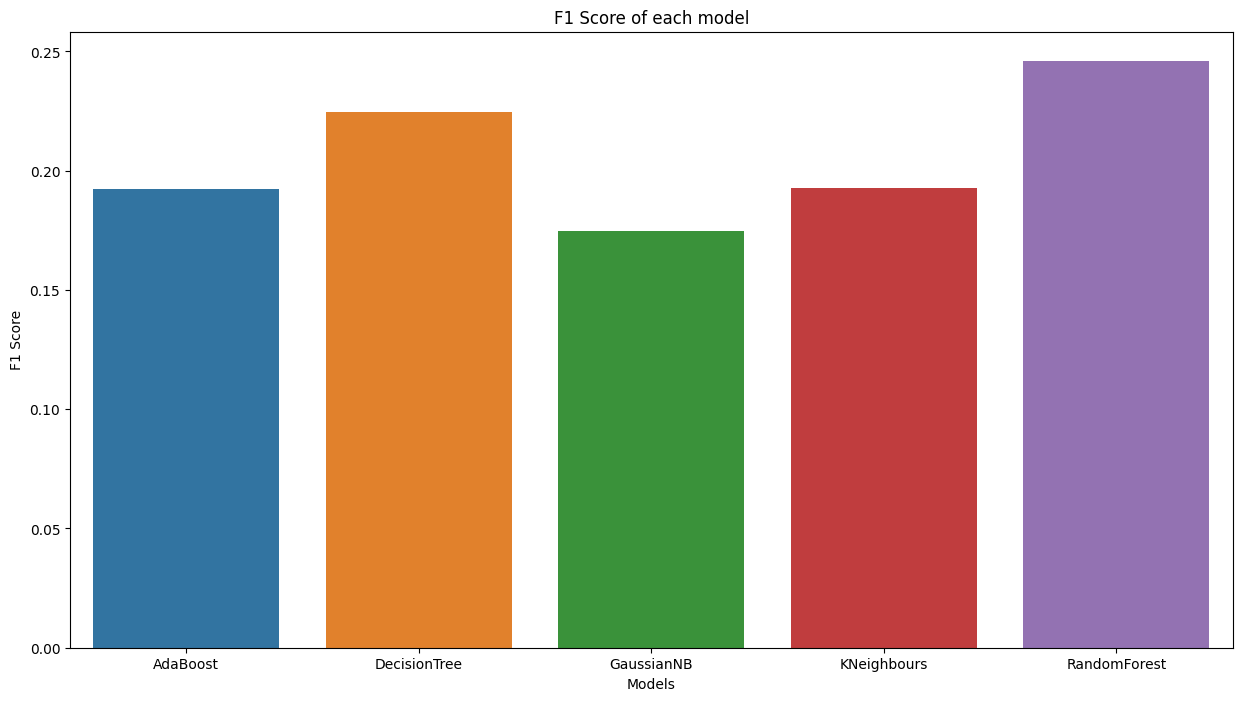

In [20]:
plt.figure(figsize=(15, 8))
plt.bar(models, f1_scores)
sns.barplot(x=models, y=f1_scores)
plt.title('F1 Score of each model')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()


In [21]:
accuracy = []
for model in models:
    if model == 'AdaBoost':
        model = AdaBoost
    elif model == 'DecisionTree':
        model = DecisionTree
    elif model == 'GaussianNB':
        model = GaussianNB
    elif model == 'KNeighbours':
        model = KNeighbours
    elif model == 'RandomForest':
        model = RandomForest
    pred_y = model.predict(X)
    accuracy.append(accuracy_score(y, pred_y))

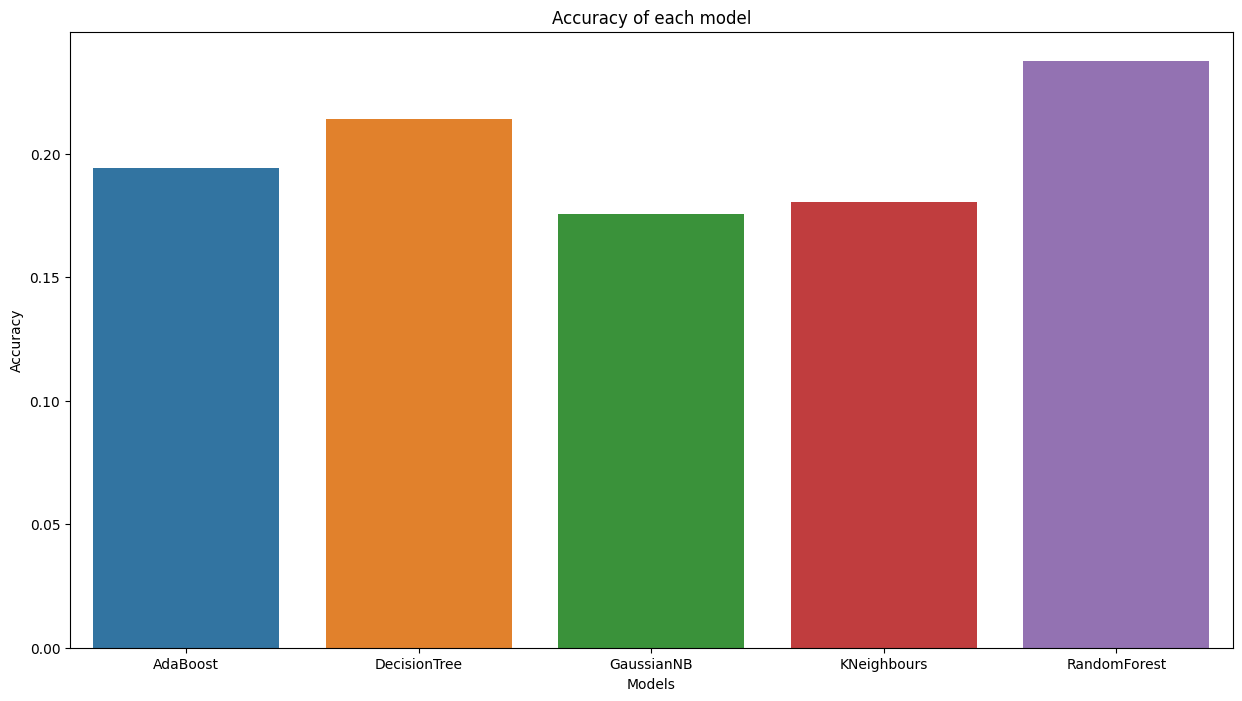

In [22]:
plt.figure(figsize=(15, 8))
plt.bar(models, accuracy)
sns.barplot(x=models, y=accuracy)
plt.title('Accuracy of each model')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [23]:
y_actual_y_pred = []

for model in models:
    if model == 'AdaBoost':
        model = AdaBoost
    elif model == 'DecisionTree':
        model = DecisionTree
    elif model == 'GaussianNB':
        model = GaussianNB
    elif model == 'KNeighbours':
        model = KNeighbours
    elif model == 'RandomForest':
        model = RandomForest
    pred_y = model.predict(X)
    count = 0
    for i in range(len(pred_y)):
        if pred_y[i] == y[i]:
            count += 1
    y_actual_y_pred.append(count)
    

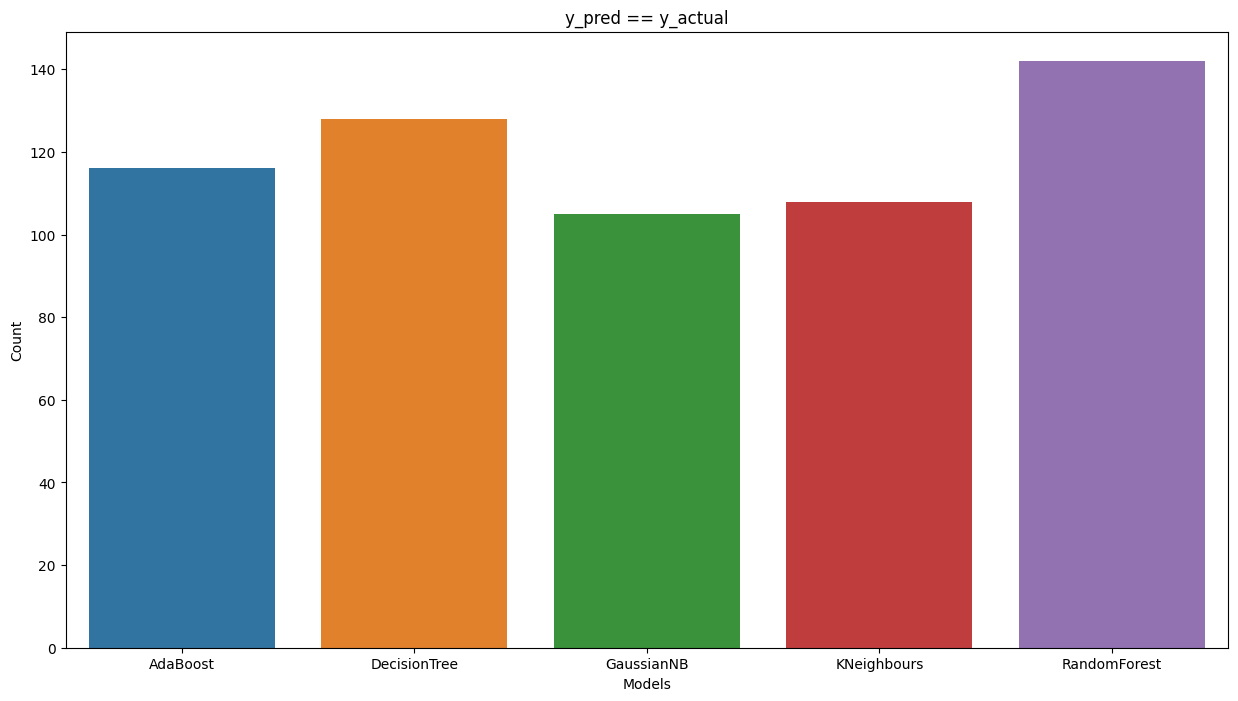

In [24]:
plt.figure(figsize=(15, 8))
sns.barplot(x=models, y=y_actual_y_pred)
plt.title('y_pred == y_actual')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()